# Intro

## Установка зависимостей

In [1]:
!pip install torch numpy matplotlib gymnasium tqdm

## Подготовка

In [2]:
!python train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 475

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent from scratch on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 49.00, avg_reward (last 50): 49.00, timesteps: 49/300000
New best model saved with reward: 49.0
Episode 2, reward: 35.00, avg_reward (last 50): 42.00, timesteps: 84/300000
Episode 3, reward: 25.00, avg_reward (last 50): 36.33, timesteps: 109/300000
Episode 4, reward: 19.00, avg_reward (last 50): 32.00, timesteps: 128/300000
Episode 5, reward: 21.00, avg_reward (last 50): 29.80, timesteps: 149/300000
Episode 6, reward: 12.00, avg_reward (last 50): 26.83, timesteps: 161/300000
Episode 7, reward: 10.00, avg_reward (last 50): 24.43, timesteps: 171/300000
Episode 8, reward: 17.00, avg_reward (last 50): 23.50, timesteps: 188/300000
Episode 9, reward: 15.00, avg_reward (last 50): 22.56, timesteps: 203/300000
Episode 10, reward: 30.00, avg_reward (last 50): 23.30, timesteps: 233/300000
Episode 11, reward: 13.00, avg_reward (last 50): 22.36, 

In [3]:
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru

Visualization of velocity_cartpole from pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt
RNN type: gru, Hidden dim: 128

Episode 1/5
Step 1: Action=0, Value=70.567
Step 2: Action=0, Value=70.860
Step 3: Action=0, Value=70.892
Step 4: Action=0, Value=70.899
Step 5: Action=1, Value=70.902
Step 6: Action=1, Value=70.904
Step 7: Action=1, Value=70.905
Step 8: Action=1, Value=70.905
Step 9: Action=1, Value=70.905
Step 10: Action=1, Value=70.904
Step 11: Action=1, Value=70.904
Step 12: Action=0, Value=70.904
Step 13: Action=1, Value=70.904
Step 14: Action=1, Value=70.903
Step 15: Action=0, Value=70.902
Step 16: Action=0, Value=70.899
Step 17: Action=0, Value=70.896
Step 18: Action=0, Value=70.893
Step 19: Action=0, Value=70.892
Step 20: Action=0, Value=70.892
Step 21: Action=0, Value=70.894
Step 22: Action=1, Value=70.897
Step 23: Action=0, Value=70.900
Step 24: Action=1, Value=70.901
Step 25: Action=1, Value=70.903
Step 26: Action=1, Value=70.903
Step 27: Action=1, Value=

In [7]:
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Analyzing 5 trajectories files in pomdp_datasets/velocity_cartpole

Dataset statistics:
Total episodes: 5
Total steps: 2500
Mean reward per episode: 500.00
Median reward per episode: 500.00
Min/Max reward: 500.00/500.00
Reward std: 0.00
Mean episode length: 500.00
Reward percentiles: 
  10%: 500.00
  25%: 500.00
  50%: 500.00
  75%: 500.00
  90%: 500.00
  95%: 500.00
  99%: 500.00
Saved histogram to plots/velocity_cartpole_rewards_histogram.png



100%|██████████| 5/5 [00:00<00:00, 1856.71it/s]


## baseline

In [8]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None_best.pt --memory_type none 

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=2440, train=2196, val=244, state_dim=2, actions=2
Epoch 1/7: Train Loss=0.7163, Val Loss=0.6938
Running environment validation...
Episode 1: Return=10.0, Steps=10
Episode 2: Return=9.0, Steps=9
Episode 3: Return=9.0, Steps=9
Episode 4: Return=11.0, Steps=11
Episode 5: Return=10.0, Steps=10
Episode 6: Return=10.0, Steps=10
Episode 7: Return=10.0, Steps=10
Episode 8: Return=9.0, Steps=9
Episode 9: Return=9.0, Steps=9
Episode 10: Return=10.0, Steps=10
Validation: Mean Return=9.70, Success Rate=0.00%
New best model with return 9.70
Epoch 2/7: Train Loss=0.6830, Val Loss=0.6785
Running environment validation...
Episode 1: Return=18.0, Steps=18
Episode 2: Return=15.0, Steps=15
Episode 3: Return=15.0, Steps=15
Episode 4: Return=15.0, Steps=15
Episode 5: Return=16.0, Steps=16
Episode 6: Return=15.0, Steps=15
Episode 7: Return=16.0, Steps=16
Episode 8: Return=15.0, Steps=15
Episode 9: Return=15.0, Steps=15
Episode


Epoch 1/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 51.25it/s, loss=0.6954, avg_loss=0.7163, lr=0.000994]

Epoch 2/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 92.49it/s, loss=0.6744, avg_loss=0.6830, lr=0.000897]

Epoch 3/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 92.26it/s, loss=0.5654, avg_loss=0.6259, lr=0.000704]

Epoch 4/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 90.59it/s, loss=0.5109, avg_loss=0.5370, lr=0.000461]

Epoch 5/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 90.01it/s, loss=0.4865, avg_loss=0.4683, lr=0.000228]

Epoch 6/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 95.54it/s, loss=0.4205, avg_loss=0.4439, lr=0.000061]

Epoch 7/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 93.61it/s, loss=0.4308, avg_loss=0.4338, lr=0.000000]


Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_None_best.pt
Memory type: none, Context length: 20

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=0, RTG=499.00
Step 3: Action=0, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=1, RTG=496.00
Step 6: Action=1, RTG=495.00
Step 7: Action=1, RTG=494.00
Step 8: Action=1, RTG=493.00
Step 9: Action=1, RTG=492.00
Step 10: Action=1, RTG=491.00
Step 11: Action=1, RTG=490.00
Step 12: Action=1, RTG=489.00
Step 13: Action=0, RTG=488.00
Step 14: Action=0, RTG=487.00
Step 15: Action=0, RTG=486.00
Step 16: Action=0, RTG=485.00
Step 17: Action=0, RTG=484.00
Episode 1 finished with reward: 17.0

Episode 2/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=0, RTG=499.00
Step 3: Action=0, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=1, RTG=496.00
Step 6: Action=

# Tasks

## Task 1: Implementing GRU and LSTM Memory (0.2 points)

### Training

In [6]:
!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=2440, train=2196, val=244, state_dim=2, actions=2
Epoch 1/7: Train Loss=0.7055, Val Loss=0.6687
Running environment validation...
Episode 1: Return=14.0, Steps=14
Episode 2: Return=16.0, Steps=16
Episode 3: Return=18.0, Steps=18
Episode 4: Return=15.0, Steps=15
Episode 5: Return=13.0, Steps=13
Episode 6: Return=15.0, Steps=15
Episode 7: Return=22.0, Steps=22
Episode 8: Return=17.0, Steps=17
Episode 9: Return=15.0, Steps=15
Episode 10: Return=15.0, Steps=15
Validation: Mean Return=16.00, Success Rate=0.00%
New best model with return 16.00
Epoch 2/7: Train Loss=0.5680, Val Loss=0.4549
Running environment validation...
Episode 1: Return=30.0, Steps=30
Episode 2: Return=29.0, Steps=29
Episode 3: Return=28.0, Steps=28
Episode 4: Return=134.0, Steps=134
Episode 5: Return=29.0, Steps=29
Episode 6: Return=128.0, Steps=128
Episode 7: Return=176.0, Steps=176
Episode 8: Return=136.0, Steps=136
Episode 9: Return=186.


Epoch 1/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 43.44it/s, loss=0.6476, avg_loss=0.7055, lr=0.000994]

Epoch 2/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 86.11it/s, loss=0.4756, avg_loss=0.5680, lr=0.000897]

Epoch 3/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 85.27it/s, loss=0.5266, avg_loss=0.4328, lr=0.000704]

Epoch 4/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 85.98it/s, loss=0.3933, avg_loss=0.4093, lr=0.000461]

Epoch 5/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 85.35it/s, loss=0.3759, avg_loss=0.3927, lr=0.000228]

Epoch 6/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 82.82it/s, loss=0.4036, avg_loss=0.3898, lr=0.000061]

Epoch 7/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 89.20it/s, loss=0.4020, avg_loss=0.3809, lr=0.000000]


In [9]:
!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=2440, train=2196, val=244, state_dim=2, actions=2
Epoch 1/7: Train Loss=0.7065, Val Loss=0.6904
Running environment validation...
Episode 1: Return=13.0, Steps=13
Episode 2: Return=12.0, Steps=12
Episode 3: Return=13.0, Steps=13
Episode 4: Return=12.0, Steps=12
Episode 5: Return=10.0, Steps=10
Episode 6: Return=11.0, Steps=11
Episode 7: Return=12.0, Steps=12
Episode 8: Return=11.0, Steps=11
Episode 9: Return=11.0, Steps=11
Episode 10: Return=12.0, Steps=12
Validation: Mean Return=11.70, Success Rate=0.00%
New best model with return 11.70
Epoch 2/7: Train Loss=0.6410, Val Loss=0.6162
Running environment validation...
Episode 1: Return=46.0, Steps=46
Episode 2: Return=19.0, Steps=19
Episode 3: Return=18.0, Steps=18
Episode 4: Return=18.0, Steps=18
Episode 5: Return=18.0, Steps=18
Episode 6: Return=17.0, Steps=17
Episode 7: Return=18.0, Steps=18
Episode 8: Return=19.0, Steps=19
Episode 9: Return=19.0, Steps=


Epoch 1/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 57.46it/s, loss=0.6948, avg_loss=0.7065, lr=0.000994]

Epoch 2/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 85.68it/s, loss=0.5953, avg_loss=0.6410, lr=0.000897]

Epoch 3/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 86.60it/s, loss=0.4901, avg_loss=0.5102, lr=0.000704]

Epoch 4/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 87.93it/s, loss=0.4250, avg_loss=0.4222, lr=0.000461]

Epoch 5/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 88.02it/s, loss=0.3675, avg_loss=0.4047, lr=0.000228]

Epoch 6/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 86.01it/s, loss=0.3932, avg_loss=0.3911, lr=0.000061]

Epoch 7/7 [Train]: 100%|██████████| 35/35 [00:00<00:00, 82.72it/s, loss=0.3816, avg_loss=0.3871, lr=0.000000]


### Validation

In [10]:
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru_best.pt --memory_type gru 

^C


Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_gru_best.pt
Memory type: gru, Context length: 20

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=1, RTG=499.00
Step 3: Action=1, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=1, RTG=496.00
Step 6: Action=1, RTG=495.00
Step 7: Action=1, RTG=494.00
Step 8: Action=0, RTG=493.00
Step 9: Action=0, RTG=492.00
Step 10: Action=0, RTG=491.00
Step 11: Action=0, RTG=490.00
Step 12: Action=0, RTG=489.00
Step 13: Action=0, RTG=488.00
Step 14: Action=0, RTG=487.00
Step 15: Action=0, RTG=486.00
Step 16: Action=0, RTG=485.00
Step 17: Action=0, RTG=484.00
Step 18: Action=0, RTG=483.00
Step 19: Action=0, RTG=482.00
Step 20: Action=0, RTG=481.00
Step 21: Action=0, RTG=480.00
Step 22: Action=1, RTG=479.00
Step 23: Action=1, RTG=478.00
Step 24: Action=1, RTG=477.00
Step 25: Action=1, RTG=476.00

4 хороших эпизода приходятся на 1 плохой

In [11]:
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm_best.pt --memory_type lstm 

Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_lstm_best.pt
Memory type: lstm, Context length: 20

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=0, RTG=499.00
Step 3: Action=0, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=1, RTG=496.00
Step 6: Action=1, RTG=495.00
Step 7: Action=1, RTG=494.00
Step 8: Action=1, RTG=493.00
Step 9: Action=1, RTG=492.00
Step 10: Action=1, RTG=491.00
Step 11: Action=1, RTG=490.00
Step 12: Action=1, RTG=489.00
Step 13: Action=0, RTG=488.00
Step 14: Action=0, RTG=487.00
Step 15: Action=0, RTG=486.00
Step 16: Action=0, RTG=485.00
Step 17: Action=0, RTG=484.00
Step 18: Action=0, RTG=483.00
Step 19: Action=0, RTG=482.00
Step 20: Action=0, RTG=481.00
Step 21: Action=0, RTG=480.00
Step 22: Action=0, RTG=479.00
Step 23: Action=0, RTG=478.00
Step 24: Action=0, RTG=477.00
Step 25: Action=0, RTG=476.

один хороший эпизод приходится на 4 плохих

## Task 2: Comparative Analysis (0.3 points)

In [ ]:
!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

In [2]:
%load_ext autoreload
%autoreload 2

Я решил покопаться в предоставленном функционале и сделал свою функцию для рапуска обучения и валидации.

In [3]:
from run_memory_dt import evaluate_memory_dt, create_env, load_model, train_memory_dt
import torch
import os

def run_experiment(ne, mt='none', patience=5):
    class args:
        eval_episodes = 20
        render = False
        debug = False
        memory_type = mt
        data_dir = 'pomdp_datasets'
        env = 'velocity_cartpole'
        load_model = None

        batch_size = 64
        context_length = 64
        n_embed = 64
        n_layer = 3
        n_head = 4
        memory_dim = 64

        learning_rate = 1e-3
        weight_decay = 1e-4
        n_epochs = ne

        
    if args.memory_type == 'none':
        args.memory_type = None

    dataset_path = os.path.join(args.data_dir, args.env)

    env = create_env(args.env)

    target_return = 500.0

    print(f"Training Memory Decision Transformer on {args.env}...")
    model, train_losses, val_returns = train_memory_dt(
        env_name=args.env,
        dataset_path=dataset_path,
        n_epochs=args.n_epochs,
        batch_size=args.batch_size,
        context_length=args.context_length,
        n_embed=args.n_embed,
        n_layer=args.n_layer,
        n_head=args.n_head,
        memory_type=args.memory_type,
        memory_dim=args.memory_dim,
        learning_rate=args.learning_rate,
        weight_decay=args.weight_decay,
        debug=args.debug,
        patience=patience
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    print(f"Evaluating model on {args.env}...")
    mean_return, returns, success_rate = evaluate_memory_dt(
        model=model,
        env=env,
        num_episodes=args.eval_episodes,
        render=args.render,
        target_return=target_return,
        context_length=args.context_length,
        debug=args.debug
    )

    res = {
        'model' : model,
        'train_losses' : train_losses,
        'val_returns' : val_returns,
        'mean_return' : mean_return,
        'returns' : returns,
        'success_rate' : success_rate
    }
    return res

In [4]:
import os
import sys
import contextlib

@contextlib.contextmanager
def suppress_output():
    # Сохраняем оригинальные stdout и stderr
    original_stdout = sys.stdout
    original_stderr = sys.stderr
    # Перенаправляем stdout и stderr в os.devnull
    with open(os.devnull, 'w') as devnull:
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            # Восстанавливаем оригинальные stdout и stderr
            sys.stdout = original_stdout
            sys.stderr = original_stderr

In [30]:
with suppress_output():
    res_none = run_experiment(1_000, 'none', patience=1_000)
res_none.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

<Axes: >

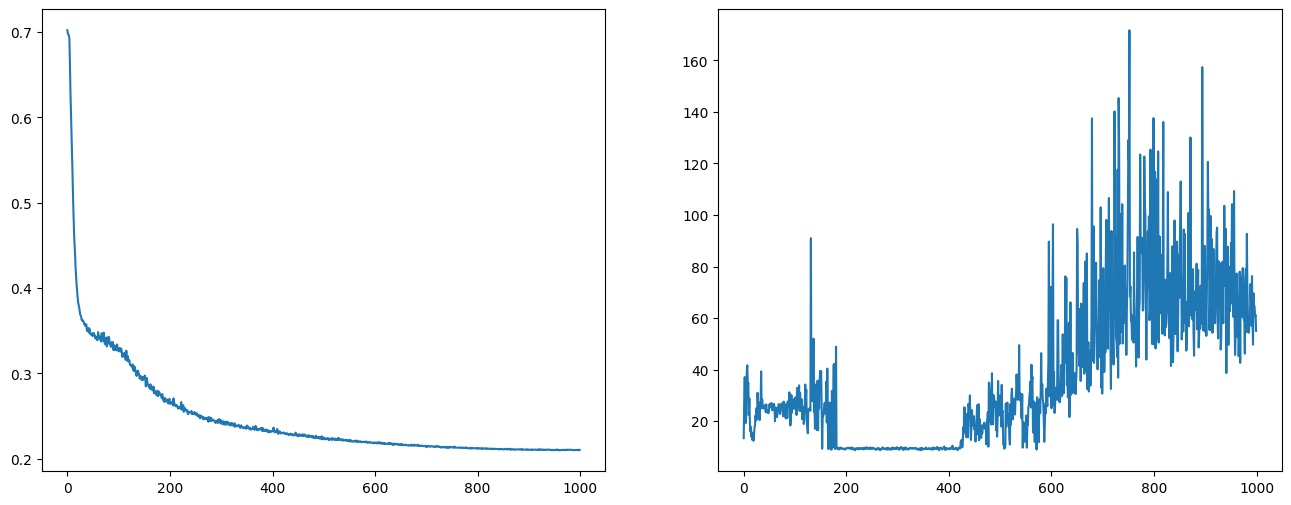

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_none['train_losses'], ax=axs[0])
sns.lineplot(res_none['val_returns'], ax=axs[1])

In [6]:
with suppress_output():
    res_none = run_experiment(5_000, 'none', patience=1_000)
res_none.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

<Axes: >

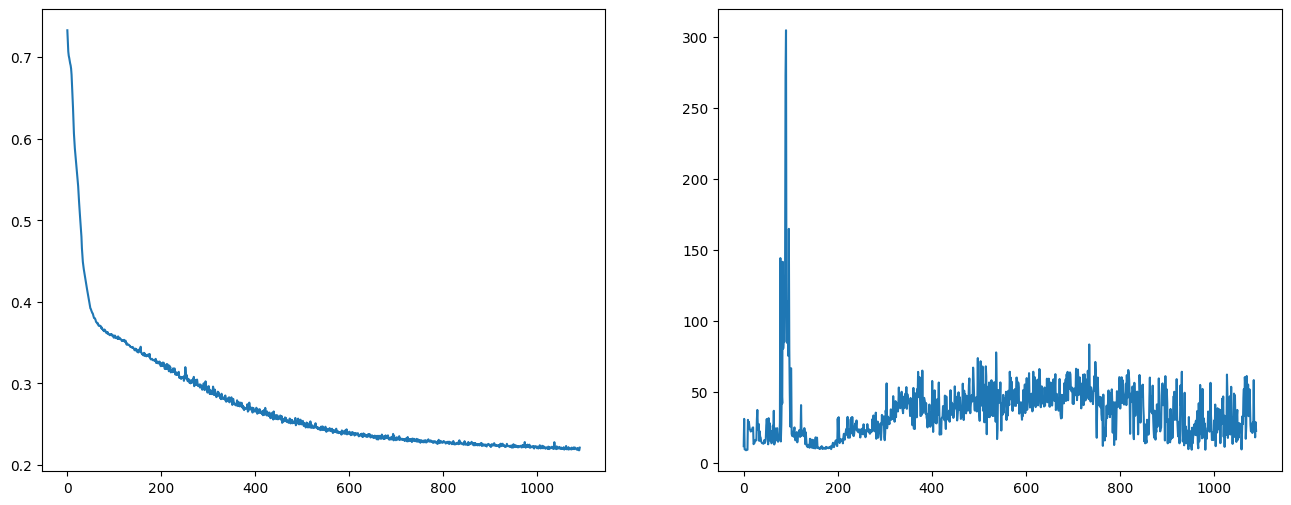

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_none['train_losses'], ax=axs[0])
sns.lineplot(res_none['val_returns'], ax=axs[1])

плоховато обучается. так ещё и не стабильно - от разу к разу может не обучаться.

In [63]:
with suppress_output():
    res_gru = run_experiment(1_000, 'gru', patience=1_000)
res_gru.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

<Axes: >

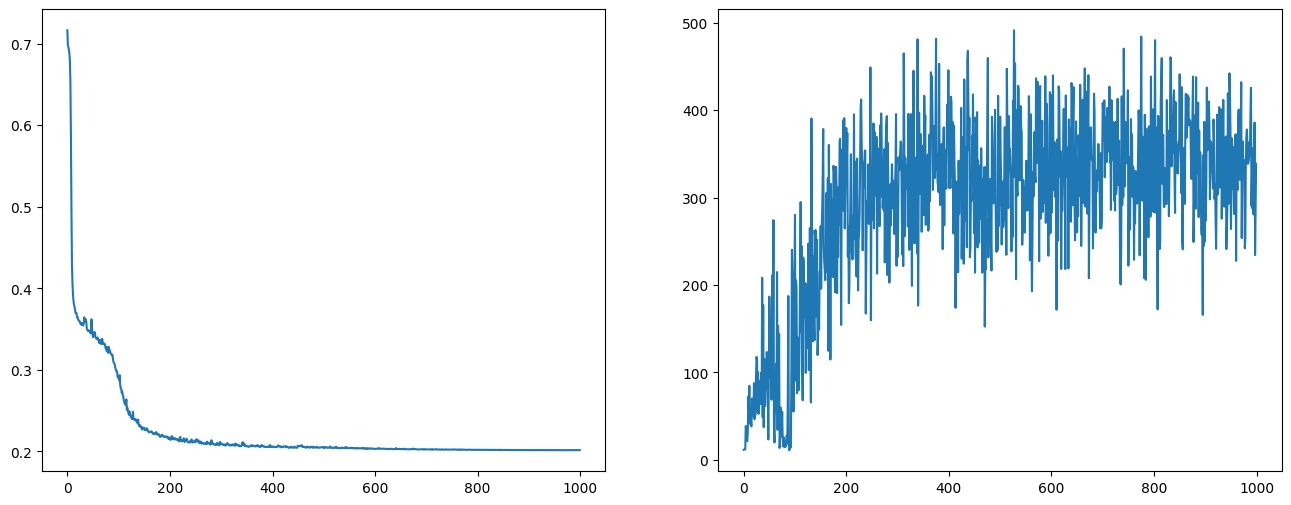

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_gru['train_losses'], ax=axs[0])
sns.lineplot(res_gru['val_returns'], ax=axs[1])

Ну в целом неплохо обучилось и вышло на "плато" медленного роста

In [65]:
with suppress_output():
    res_lstm = run_experiment(1_000, 'lstm', patience=1_000)
res_lstm.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

In [66]:
res_lstm['mean_return']

np.float64(173.1)

<Axes: >

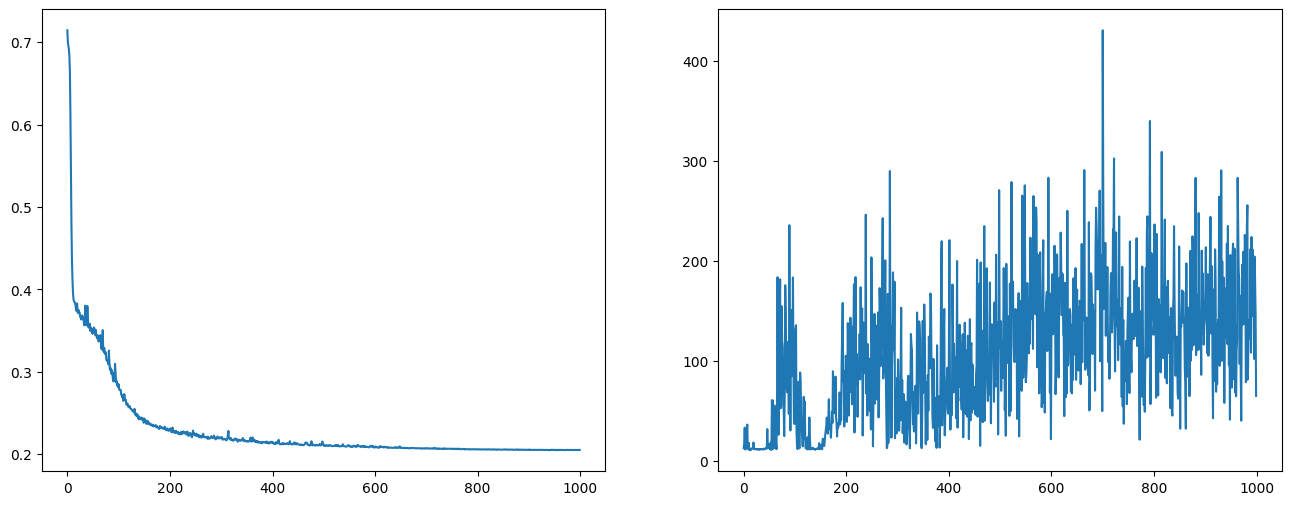

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_lstm['train_losses'], ax=axs[0])
sns.lineplot(res_lstm['val_returns'], ax=axs[1])

In [8]:
with suppress_output():
    res_lstm = run_experiment(2_500, 'lstm', patience=1_000)
res_lstm.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

<Axes: >

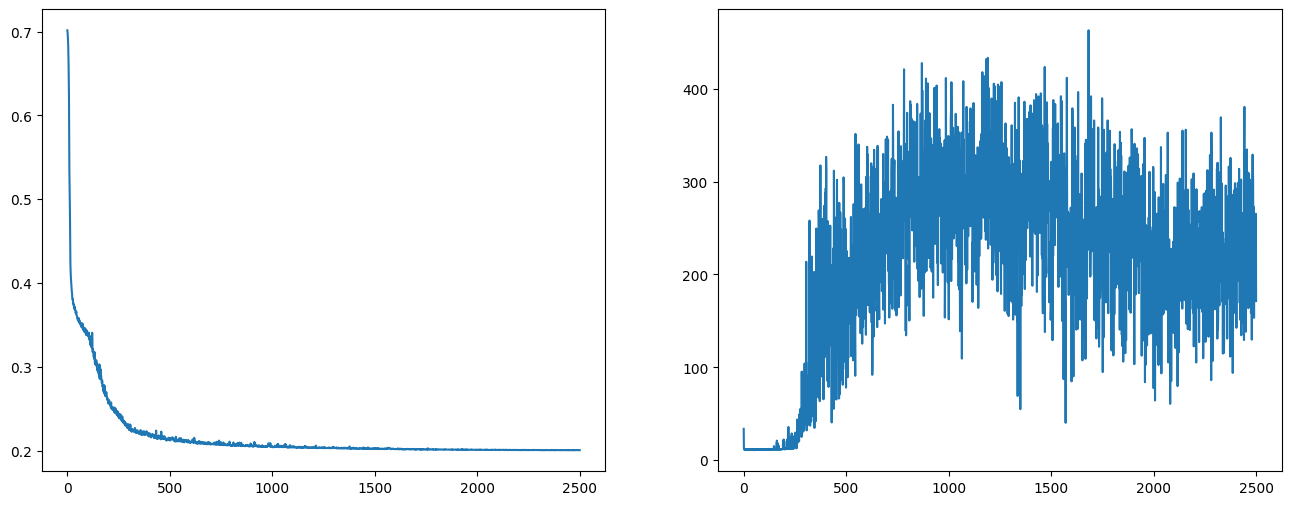

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_lstm['train_losses'], ax=axs[0])
sns.lineplot(res_lstm['val_returns'], ax=axs[1])

3.5 часа обучения!!!

Честно говоря, как говорил классик, "что то фигня, что это фигня".

Учится очень не стабильно.

Почему-то bidirectional не учится (или, возможно, очень медленно, т.к. там слоёв получается x2) и поэтому, видимо, работает быстро; а вот без него учится нормально.

Но учится конечно не быстро. 2 часа GRU и 47 (вроде) минут LSTM 1000 итераций с дефолтными параметрами.

Но по итогу вот этих заходов получаем следующие выводы:
1. скорость сходимости (обучения): none < lstm < gru. Лучше всех сходится GRU модель. LSTM не успела нормально обучиться, без памяти тоже только начала.
2. качество итогового результата: none < lstm < gru
3. общий вклад памяти - стабилизирует обучение на начальных этапах, повышает итоговое качество в целом, но всё это ценой замедления обучения и инфренса.

## Task 3: Custom Memory Mechanism (0.3 points)

По запросу "desision transformer with memory" второе, что попалось на глаза - была статья https://arxiv.org/pdf/2305.16338.

Ребята предлагают иметь у себя матрицу из слотов памяти, которую через механизм внимания обновляют от батча к батчу.

За основу берётся идея такая:
+ получаем на вход пропущенные через энкодер s, a, r
+ выбираем места, куда будем писать (какую память замещать)
+ выбираем, как сильно будем затирать старые знания
+ обновляем память
+ новую память подаём в декодер

Я поменял механизм модели соответствующим образом, но ни после оригинального применения памяти, ни после того, как я заменил E_out = (M * w) на прибавление проекции памяти к входу типа: E_out = E_input + linear(w * M), обучаться это чудо юдо не начало.

In [178]:
with suppress_output():
    res_transformer = run_experiment(10_000, 'transformer', patience=3_000)
res_transformer.keys()

dict_keys(['model', 'train_losses', 'val_returns', 'mean_return', 'returns', 'success_rate'])

<Axes: >

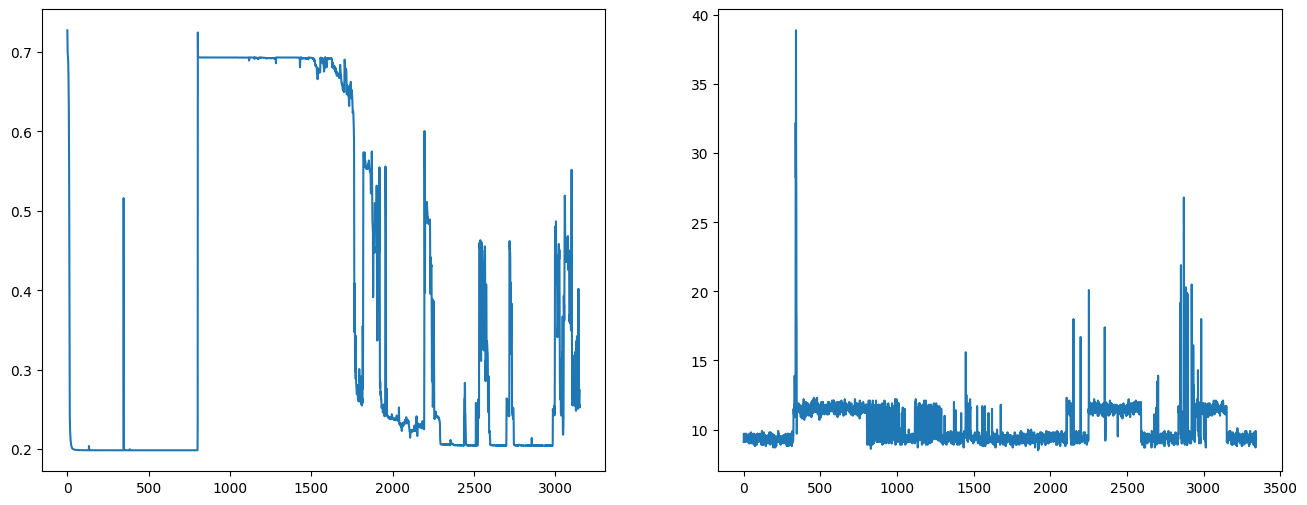

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_transformer['train_losses'], ax=axs[0])
sns.lineplot(res_transformer['val_returns'], ax=axs[1])

Далее я попробовал реализовать идею из статьи https://arxiv.org/pdf/2410.10132.

Идея та же, что и в предыдущем случае, только другая функция для подсчёта выходного вектора из memory-блока.
Они там говорят, что основная мысль статьи - оператор Адамара для вычисления Calibration матрицы - это супер гуд.

Я постарался реализовать всё супер аккуратно.

Вроде всё сделал верно, но всё равно обучаться модель отказывалась. Тут ещё такая проблема, что она довольно медленно обучается, т.к. всё реализовано бесхитростно на Python.

In [ ]:
with suppress_output():
    # SHM = Stable Hadamar Memory
    res_hsm = run_experiment(500, 'SHM', patience=200)
res_hsm.keys()

<Axes: >

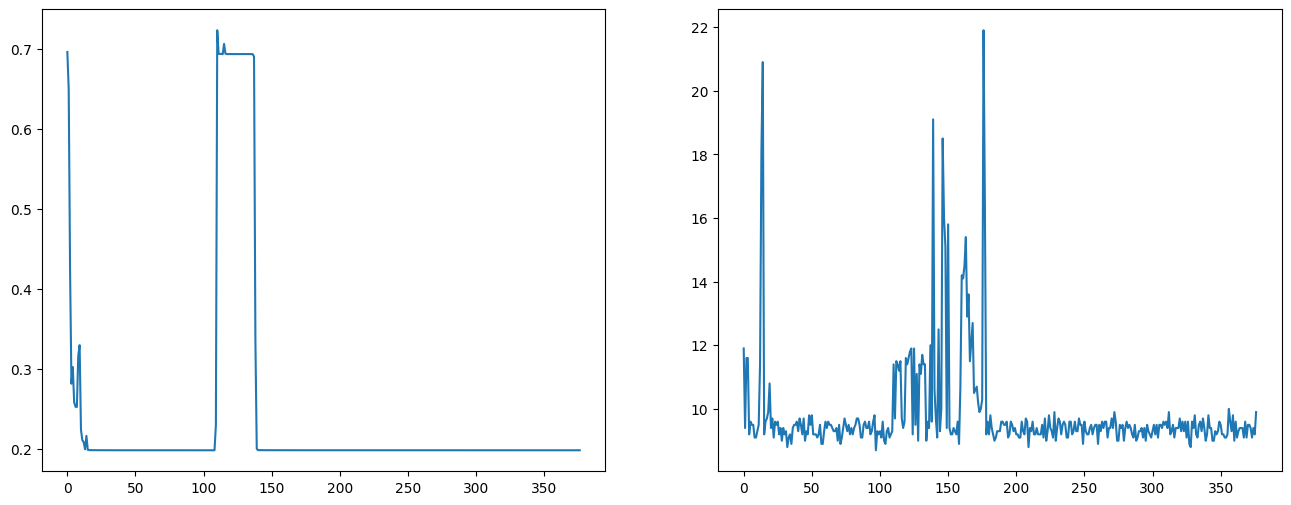

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.lineplot(res_hsm['train_losses'], ax=axs[0])
sns.lineplot(res_hsm['val_returns'], ax=axs[1])

## Submission Guidelines (0.2 points)

надеюсь моё оформление было достаточно "professional"